# Задание #
[file с заданием:](http://school.podvorye.ru/astro/Ptashin/HIP-TGAS.txt)

Сравнение тригонометрических параллаксов звезд TGAS и Hipparcos

1. Дополнение TGAS данными из Hipparocs (параллаксами)    
    Каталог получится из 100 000 звезд.

2. Таблицу "рекордсменов" по разностям параллаксом. Первые 50 звезд с самыми большими отличиями.
   Табличку.
   
3. ... на потом   
   Построение полных разностей параллаксов по небесной сфере и (возможно) анализ их с помощью сферических функций.
   
   
       

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sys
import os

from urllib.request import urlretrieve,urlopen
from datetime import datetime

# Enable inline plotting
%matplotlib inline

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.0 |Anaconda 4.3.1 (64-bit)| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Numpy version 1.11.3
Pandas version 0.19.2
Matplotlib version 2.0.0


In [16]:
def times():
    #time_format = "[%Y.%m.%d-%H:%M:%S.%f]"
    time_format = "[%H:%M:%S.%f]"
    return str(datetime.strftime(datetime.now(), time_format))

## 1 Дополнение TGAS данными из Hipparocs (параллаксами) ##

### Загрузим в начале Tgas

In [17]:
!ls ./../../../data/astro/tgas/


ReadMe.txt		    TgasSource_000-000-007.csv
tgasptyc.dat		    TgasSource_000-000-008.csv
TgasSource_000-000-000.csv  TgasSource_000-000-009.csv
TgasSource_000-000-001.csv  TgasSource_000-000-010.csv
TgasSource_000-000-002.csv  TgasSource_000-000-011.csv
TgasSource_000-000-003.csv  TgasSource_000-000-012.csv
TgasSource_000-000-004.csv  TgasSource_000-000-013.csv
TgasSource_000-000-005.csv  TgasSource_000-000-014.csv
TgasSource_000-000-006.csv  TgasSource_000-000-015.csv


In [19]:
%%time

local_tgas = './../../../data/astro/tgas/'
file_tgas = 'TgasSource_000-000-000.csv'
print('{}: Loading file {}..'.format(times(), file_tgas), end='')
df_tgas = pd.read_csv(local_tgas + file_tgas)
len_file = len(df_tgas)
print(' len_file = {}'.format(len_file))


for i in np.arange(1,16):
#for i in np.arange(1,2):
    n = '0'*(3 - len(str(i)))+str(i)
    file_tgas = 'TgasSource_000-000-'+n+'.csv'
    print('{}: Loading file {}..'.format(times(), file_tgas), end='')
    df0_tgas = pd.read_csv(local_tgas + file_tgas)
    len_df0 = len(df0_tgas)
    df_tgas = df_tgas.append(df0_tgas)
    len_df = len(df_tgas)
    df0_tgas._clear_item_cache()
    print(' len_file = {}, len_df = {}'.format(len_df0, len_df))
print('{}: [/] End'.format(times()))

[05:07:53.956486]: Loading file TgasSource_000-000-000.csv.. len_file = 134865
[05:07:57.362937]: Loading file TgasSource_000-000-001.csv.. len_file = 134865, len_df = 269730
[05:07:59.842763]: Loading file TgasSource_000-000-002.csv.. len_file = 134865, len_df = 404595
[05:08:02.546640]: Loading file TgasSource_000-000-003.csv.. len_file = 134865, len_df = 539460
[05:08:05.164935]: Loading file TgasSource_000-000-004.csv.. len_file = 134865, len_df = 674325
[05:08:07.856584]: Loading file TgasSource_000-000-005.csv.. len_file = 134865, len_df = 809190
[05:08:10.541622]: Loading file TgasSource_000-000-006.csv.. len_file = 134865, len_df = 944055
[05:08:13.379060]: Loading file TgasSource_000-000-007.csv.. len_file = 134865, len_df = 1078920
[05:08:16.234883]: Loading file TgasSource_000-000-008.csv.. len_file = 134865, len_df = 1213785
[05:08:19.484199]: Loading file TgasSource_000-000-009.csv.. len_file = 134865, len_df = 1348650
[05:08:22.854057]: Loading file TgasSource_000-000-010

### Теперь загрузим Hipparcos

In [5]:
!ls ./../../../data/astro/hip/

aa8357-07.pdf  hip7p.dat  hipvim.dat  ReadMe.txt
hip2.dat       hip9p.dat  intro.pdf


In [6]:
%%time

local_hip = './../../../data/astro/hip/'
file_hip = 'hip2.dat'
name_col = ['hip', #Hipparcos identifier
            'isol_n', #Sol. type new reduction
            'isol_o', #Sol. type old reduction
            'ncomp', #Number of components
            'α', #Right Ascension in ICRS
            'δ', #Declination in ICRS
            'parallax_hip', #Parallax
            'μ_α', #Proper motion in Right Ascension
            'μ_δ', #Proper motion in Declination
            'σ_α', #Formal error on α
            'σ_δ', #Formal error on δ
            'parallax_error_hip', #Formal error on parallax
            'σ_μ_α', #Formal error on μ α
            'σ_μ_δ', #Formal error on μ δ
            'nobs', #Number of field transits used
            'gof', #Goodness of fit
            'prej', #Percentage rejected data
            'var', #Cosmic dispersion added
            'ic', #Entry in one of the suppl.catalogues
            'Hp', #Hp magnitude
            'e_Hp', #Error on mean Hp
            'σ_Hp', #Scatter of Hp
            'VarAnn', #Reference to variability annex
            'V_B', #Colour index
            'σ_V_B', #Formal error on colour index
            'V_I', #Colour index
            'U_1', #Upper-triangular weight matrix
            'U_2', #Upper-triangular weight matrix
            'U_3', #Upper-triangular weight matrix
            'U_4', #Upper-triangular weight matrix
            'U_5', #Upper-triangular weight matrix
            'U_6', #Upper-triangular weight matrix
            'U_7', #Upper-triangular weight matrix
            'U_8', #Upper-triangular weight matrix
            'U_9', #Upper-triangular weight matrix
            'U_10', #Upper-triangular weight matrix
            'U_11', #Upper-triangular weight matrix
            'U_12', #Upper-triangular weight matrix
            'U_13', #Upper-triangular weight matrix
            'U_14', #Upper-triangular weight matrix
            'U_15'  #Upper-triangular weight matrix
           ]
print('{}: [/] Loading file {}..'.format(times(), file_hip), end='')
df_hip = pd.read_csv(local_hip + file_hip,
                     sep="\s+", 
#                     skiprows=1,
#                     usecols=[0,7],
                     names=name_col
                    )
len_file = len(df_hip)
print(' len_file = {}'.format(len_file))

[2017.12.28-05:01:53.513045]: [/] Loading file hip2.dat.. len_file = 117955
CPU times: user 832 ms, sys: 8 ms, total: 840 ms
Wall time: 834 ms


### Выделим из tgas звезды, которые есть в hip

In [7]:
df_tgas_hip = df_tgas[~df_tgas['hip'].apply(lambda x: np.isnan(x))]#[['hip','parallax','parallax_error']]

In [8]:
df_tgas_hip['hip'] = df_tgas_hip['hip'].apply(lambda x: int(x))

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
df_tgas_hip.sort_values(by='hip',inplace=True)

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
df_hip_tgas = df_hip[df_hip.hip.isin(df_tgas_hip['hip'])][['hip','parallax_hip','parallax_error_hip']]

Изменяем индексацию, что бы скрестить два каталога. В адльнейшем df_tgas_hip нельзя будет скрещивать с df_tgas стандартными функциями.

In [11]:
df_tgas_hip.index = df_hip_tgas.index

In [12]:
df_tgas_hip['parallax_hip'] = df_hip_tgas['parallax_hip']
df_tgas_hip['parallax_error_hip'] = df_hip_tgas['parallax_error_hip']
#df_tgas_hip['parallax_relatively_difference'] = np.abs(df_tgas_hip['parallax'] - df_tgas_hip['parallax_hip'])

df_tgas_hip.head(10)

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,hip,tycho2_id,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,...,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_mag,phot_variable_flag,l,b,ecl_lon,ecl_lat,parallax_hip,parallax_error_hip
0,1,NaN,1635378410781933568,2738327524223598464,985215,2015.0,0.000872,0.521615,1.088980,0.213888,...,4.221590e+06,3425.831131,8.961080,NOT_AVAILABLE,97.185846,-59.187304,0.434029,0.998757,4.55,1.33
2,3,NaN,1635378410781933568,2881742976228516992,824535,2015.0,0.005057,0.614117,38.859270,0.594055,...,3.692776e+07,31053.439561,6.606388,NOT_AVAILABLE,112.090065,-22.927583,17.774821,35.142344,2.26,0.36
3,4,NaN,1635378410781933568,4973386036426283264,234891,2015.0,0.009045,0.157519,-51.893538,0.194476,...,1.054341e+07,6216.288289,7.967318,NOT_AVAILABLE,320.792279,-63.415496,333.113127,-46.217681,7.45,0.77
4,5,NaN,1635378410781933568,2305974984968767232,1133156,2015.0,0.009974,0.246131,-40.591167,0.136933,...,8.325420e+06,4523.386699,8.223755,NOT_AVAILABLE,337.897876,-72.861717,341.187574,-36.656694,3.88,0.95
5,6,NaN,1635378410781933568,2740326848679651200,1705542,2015.0,0.019617,0.294792,3.946412,0.128232,...,3.663129e+05,657.044105,11.615140,NOT_AVAILABLE,99.220773,-56.542398,1.589883,3.612503,18.17,5.81
6,7,NaN,1635378410781933568,2846308877560478464,1803143,2015.0,0.021066,0.201562,20.035302,0.066429,...,3.242792e+06,760.257098,9.247472,NOT_AVAILABLE,106.817969,-41.224050,8.272506,18.311983,17.28,1.16
9,10,NaN,1635378410781933568,4976500987227870464,300648,2015.0,0.036696,0.118590,-50.866804,0.212226,...,6.703737e+06,9644.679477,8.458978,NOT_AVAILABLE,321.804876,-64.340579,333.973849,-45.384348,10.83,1.00
10,11,NaN,1635378410781933568,387133543014624384,1346136,2015.0,0.037403,0.328360,46.939988,0.297227,...,1.891578e+07,14147.825196,7.332709,NOT_AVAILABLE,113.905512,-15.030896,23.087006,42.080251,4.18,0.60
11,12,NaN,1635378410781933568,2308086871927817344,962921,2015.0,0.040873,0.233974,-35.960215,0.169250,...,1.256984e+07,7552.255226,7.776446,NOT_AVAILABLE,350.749503,-75.974778,343.937544,-32.615366,3.25,0.98
12,13,NaN,1635378410781933568,2340148424835415552,586737,2015.0,0.041722,0.162582,-22.594750,0.117653,...,6.759521e+06,5976.706356,8.449980,NOT_AVAILABLE,51.436597,-77.526396,350.638005,-20.657079,-0.10,1.27


## 2 Посчитаем разности параллаксов ##

In [13]:
srez = (df_tgas_hip['parallax'] > 0) & (df_tgas_hip['parallax_hip'] > 0)

df_tgas_hip['parallax_difference'] = np.abs( 
    df_tgas_hip[srez]['parallax'] - 
    df_tgas_hip[srez]['parallax_hip'])

/home/p_a/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Выыедим таблицу "рекордсменов" в порядке убывания по разности параллаксов.

In [14]:
df_tgas_hip[['hip','parallax','parallax_hip','parallax_difference']].sort_values(by='parallax_difference', ascending=False).head(50)

,hip,parallax,parallax_hip,parallax_difference
20946,21000,3.613519,93.67,90.056481
42393,42525,5.939341,68.54,62.600659
116689,117081,7.767833,63.56,55.792167
91751,92059,1.025301,55.49,54.464699
16539,16582,3.352539,46.79,43.437461
49814,49971,10.032883,53.21,43.177117
14066,14101,148.510255,106.16,42.350255
90068,90368,9.239326,51.00,41.760674
87493,87784,0.901640,41.30,40.398360
11139,11167,1.600522,40.32,38.719478


### Построение полных разностей параллаксов по небесной сфере

CPU times: user 772 ms, sys: 8 ms, total: 780 ms
Wall time: 805 ms


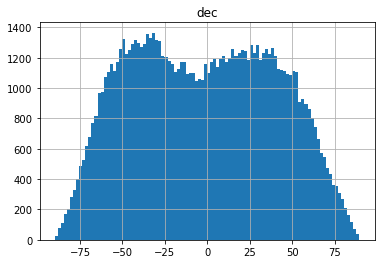

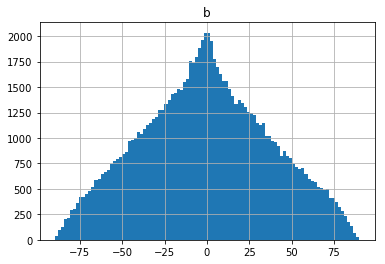

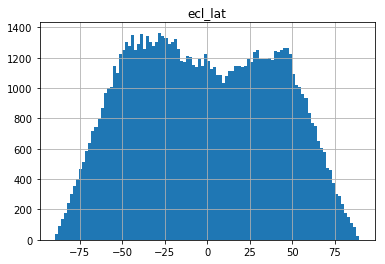

In [36]:
%%time


df_tgas_hip.loc[df_tgas_hip['ra'] > 180,'ra'] = df_tgas_hip.loc[df_tgas_hip['ra'] > 180].ra - 360
df_tgas_hip.loc[df_tgas_hip['l'] > 180,'l'] = df_tgas_hip.loc[df_tgas_hip['l'] > 180].l - 360
df_tgas_hip.loc[df_tgas_hip['ecl_lon'] > 180,'ecl_lon'] = df_tgas_hip.loc[df_tgas_hip['ecl_lon'] > 180].ecl_lon - 360

df_tgas_hip.hist('dec', bins=100)
df_tgas_hip.hist('b', bins=100)
df_tgas_hip.hist('ecl_lat', bins=100)

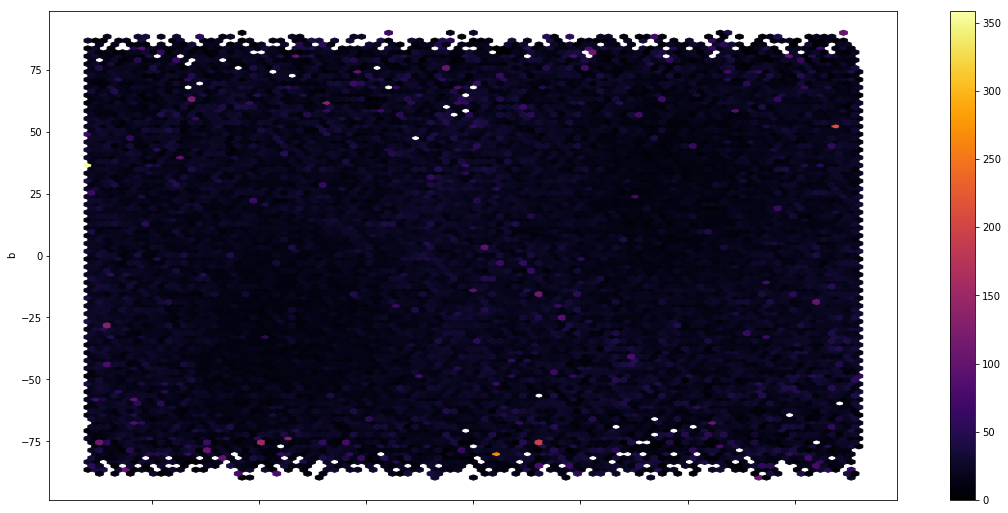

In [ ]:
df_tgas_hip.plot.hexbin(x='l',y='b',C='parallax_difference',
                        #color = 'k',
                        #nipy_spectral,gist_ncar,jet,cubehelix,gist_stern,flag
                        cmap='inferno',
                        bins = 360, 
                        #projection = 'hammer',
                        figsize=(19,9))

In [ ]:
%%time

def hexbinmy(df0,x,y,c,gridsize=50):
    import matplotlib as mpl
    plt.figure(figsize=(16,9))
    ax = plt.subplot(111, projection = 'hammer')
    print('{}: Begin plot_hex_hammer paralax {}, {}, {}.'.format(times(),x,y,gridsize))
    h = ax.hexbin(
        df0[x]*np.pi/180,
        df0[y]*np.pi/180,
        C = df0[c],
        gridsize=gridsize,
        cmap='inferno',
        mincnt=0,
        #vmax=10,
        #s = 1.05,
        #marker='o',
        #color = 'r',
        #linewidths=0.01,
        #label = '20-40 ra'
    )
    
    bounds = [i for i in np.arange(max(h.get_array()))]
    cmap = mpl.cm.cool
    norm = mpl.colors.BoundaryNorm(bounds[::len(bounds)//10], cmap.N)
    cb = plt.colorbar(h,
                      cmap=cmap,               
                      norm=norm,
                      boundaries=[-10] + bounds + [10],
                      extend='both',
                      # Make the length of each extension
                      # the same as the length of the
                      # interior colors:
                      extendfrac='auto',
                      ticks=bounds,
                      spacing='uniform',
                      orientation='horizontal',
                      #extendfrac='auto',
                      #spacing='proportional',
                      #extend='both',
                      #orientation='horizontal'
                     )
    
    #ax.contour(X,Y,Z,10,colors='k')
    #ax.scatter([0],[np.pi/2],color = 'g')#,51.1,marker='o',color = 'r',linewidths=0.01)
    #''''o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X''''
    #cb.set_label('counts')
    plt.legend(loc='best');
    plt.grid(color='g', linestyle='--', linewidth=0.5)
    params = matplotlib.figure.SubplotParams(left=.02, right=.98, top=.99, bottom=.01)
    plt.tight_layout()
    plt.savefig('hexbin_'+x+'-'+y+'_'+str(gridsize)+'.png',dpi=1000,format='png')
    print('{}: End plot_hammer paralax.'.format(times()))
    plt.show()

hexbinmy(df_tgas_hip,'l','b','parallax_difference',360)